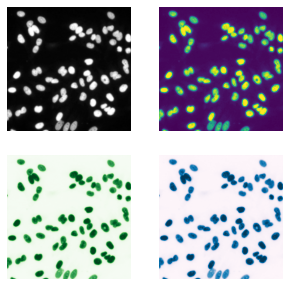

In [1]:
import matplotlib.pyplot as plt

img = plt.imread("nuclei1.tif")

fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (5, 5))

ax[0, 0].imshow(img, "gray")
ax[0, 1].imshow(img, "viridis")
ax[1, 0].imshow(img, "Greens")
ax[1, 1].imshow(img, "PuBu")

for a in ax.ravel():
    a.axis("off")
    
plt.show()

In [2]:
img1 = img[0:100, 0:100]
img2 = img[:, 0:100]

print(img.shape)
print(img1.shape)
print(img2.shape)

(366, 366)
(100, 100)
(366, 100)


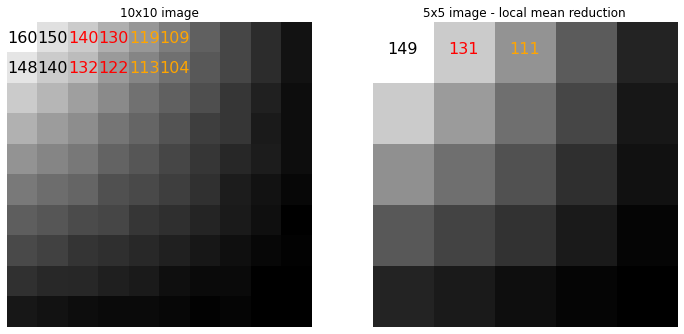

In [3]:
import numpy as np
from matplotlib.patches import Rectangle
from skimage.transform import downscale_local_mean

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

np.random.seed(42)
img = np.random.choice(range(150), (10, 10))
img = np.zeros((10, 10))

for x in range(10):
    for y in range(10):
        img[x, y] = (10-x) * (10-y) + 50 + np.random.normal(10)

img = img.astype(int)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")

for x in range(2):
    for y in range(2):
        ax[0].text(x, y, img[x,y], size = 16, horizontalalignment="center", verticalalignment="center", color = "black")
for x in range(2,4):
    for y in range(2):
        ax[0].text(x, y, img[x,y], size = 16, horizontalalignment="center", verticalalignment="center", color = "red")
for x in range(4,6):
    for y in range(2):
        ax[0].text(x, y, img[x,y], size = 16, horizontalalignment="center", verticalalignment="center", color = "orange")

img_small = downscale_local_mean(img, (2, 2)).astype(int)
ax[1].imshow(img_small, cmap="gray")
ax[1].axis("off")

ax[1].text(0, 0, img_small[0,0], size = 16, horizontalalignment="center", color = "black")
ax[1].text(1, 0, img_small[1,0], size = 16, horizontalalignment="center", color = "red")
ax[1].text(2, 0, img_small[2,0], size = 16, horizontalalignment="center", color = "orange")

ax[0].set_title("10x10 image")
ax[1].set_title("5x5 image - local mean reduction")
plt.show()

array([[102.25,  88.25,  73.  ,  77.75,  81.75],
       [ 67.5 ,  73.25,  49.5 ,  53.  ,  77.  ],
       [ 37.5 ,  93.75,  86.5 ,  89.75,  24.25],
       [ 83.5 ,  40.25,  42.25,  69.5 ,  64.25],
       [106.  ,  70.5 ,  73.5 ,  62.75,  61.25]])

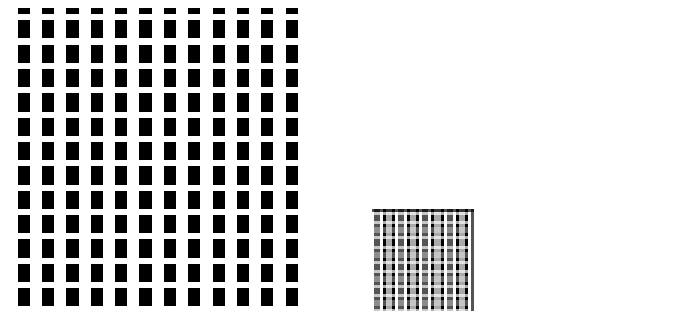

In [4]:
img = np.zeros((100, 100)).astype(int)
for i in range(0, 100, 8):
    img[:, i:(i+4)] = 254
    img[i:(i+2)] = 254
img_small = downscale_local_mean(img, factors=(3, 3))
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

np.random.seed(42)

ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_small, cmap="gray", vmin=0, vmax=255)
ax[1].axis("off")
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 100)

plt.show()

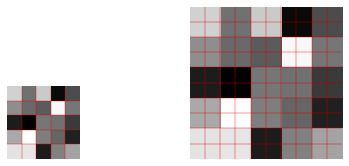

In [5]:
from skimage.transform import rescale, resize
np.random.seed(12345)
img = np.random.choice(range(255), (5, 5)).astype(int)
img_scaled = rescale(img, 2, order=0)
img_scaled = img_scaled[::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap="gray")
for x in range(1,5):
    for y in range(1,5):
        ax[0].axvline(x-0.5, 0, 0.47, c="red", linewidth=0.1)
        ax[0].axhline(y-0.5, 0, 0.47, c="red", linewidth=0.1)
ax[0].axis("off")
ax[0].set_ylim((-0.5, 10))
ax[0].set_xlim((-0.5, 10))
ax[1].imshow(img_scaled, cmap="gray")
for x in range(1,10):
    for y in range(1,10):
        ax[1].axvline(x-0.5, 0, 1, c="red", linewidth=0.05)
        ax[1].axhline(y-0.5, 0, 1, c="red", linewidth=0.05)
ax[1].axis("off")
plt.show()


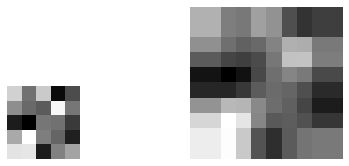

In [6]:
from skimage.transform import rescale, resize
np.random.seed(12345)
img = np.random.choice(range(255), (5, 5)).astype(int)
img_scaled = rescale(img[::-1], 2, order=1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[0].set_ylim((-0.5, 10))
ax[0].set_xlim((-0.5, 10))

ax[1].imshow(img_scaled, cmap="gray")
ax[1].axis("off")
plt.show()

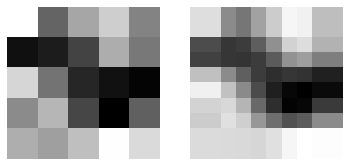

In [7]:
from skimage.transform import rescale, resize
from matplotlib.patches import Rectangle

np.random.seed(1245)
img = np.random.choice(range(255), (5, 5)).astype(int)

img_scaled = rescale(img, 2, order=1, preserve_range=True)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_scaled, cmap="gray")
ax[1].axis("off")

# for x in range(2, 4):
#     for y in range(2, 4):
#         ax[0].text(x, y, img[x, y], size = 16, ha="center", va="center", color="orange")

# for x in range(4, 8):
#     for y in range(4, 8):
#         val = int(img_scaled[y, x])
#         col = "orange"
#         if x == 5 and y == 5:
#             col = "red"
#         ax[1].text(x, y, f"{val}", size = 10, ha="center", va="center", color=col)

# ax[0].add_patch(Rectangle((1.5, 3.5), 2, -2, fill = False, color="orange"))
# ax[1].add_patch(Rectangle((3.5, 7.5), 4, -4, fill = False, color="orange"))


plt.show()

In [8]:
np.random.seed(1245)
img = np.array([[0, 60]]).astype(int)
img_scaled = rescale(img, (1, 3), order=1, preserve_range=True).astype(int)

print(img)
print(img_scaled)
print(np.linspace(0, 60, 6))

[[ 0 60]]
[[19  0 20 40 59 39]]
[ 0. 12. 24. 36. 48. 60.]


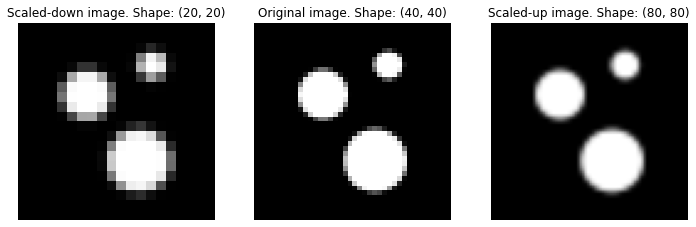

In [9]:
img = plt.imread("circles.png")
fig, ax = plt.subplots(1, 3, figsize=(12,4))
img = img[:,:,0]
ax[1].imshow(img, cmap="gray")
ax[1].axis("off")
ax[1].set_title(f"Original image. Shape: {img.shape}")
img_lin_up = rescale(img, 2, order=1)
ax[2].imshow(img_lin_up, cmap="gray")
ax[2].axis("off")
ax[2].set_title(f"Scaled-up image. Shape: {img_lin_up.shape}")
img_lin_down = rescale(img, (.5,.5), order=1)
ax[0].imshow(img_lin_down, cmap="gray")
ax[0].axis("off")
ax[0].set_title(f"Scaled-down image. Shape: {img_lin_down.shape}")
plt.show()


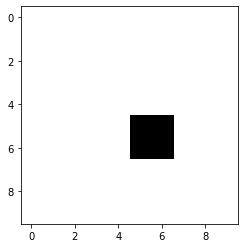

[[  0.76604444  -0.64278761  -2.46513667]
 [  0.64278761   0.76604444 -28.17664106]
 [  0.           0.           1.        ]]
<SimilarityTransform(matrix=
    [[  0.76604444,  -0.64278761,  -2.46513667],
     [  0.64278761,   0.76604444, -28.17664106],
     [  0.        ,   0.        ,   1.        ]])>


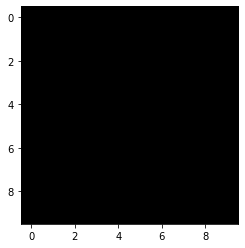

In [31]:
from skimage.transform import warp, SimilarityTransform

plt.imshow(img, cmap="gray")
plt.show()

tr_matrix = SimilarityTransform(translation=(-20, -20))
rot_matrix = SimilarityTransform(rotation=np.deg2rad(40))
tr_matrix2 = SimilarityTransform(translation=(20, 20))

plt.imshow(warp(img, tr_matrix+rot_matrix+tr_matrix2, order=1), cmap="gray")

plt.show()

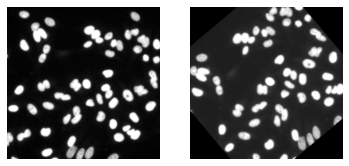

In [11]:
from skimage.transform import rotate
from skimage import img_as_float, img_as_ubyte

fig, ax = plt.subplots(1, 2)
img = plt.imread("nuclei1.tif")
img = img_as_float(img)
img = img + 0.1
img = np.clip(img, 0, 1)
img = img_as_ubyte(img)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(rotate(img, 40), cmap="gray")
for a in ax:
    a.axis("off")


In [12]:
a = np.array([[1],[2],[1]])
m = np.array([[1,2,3],[4,5,6]])

print(m.shape)
print(a.shape)
np.dot(m, a)

(2, 3)
(3, 1)


array([[ 8],
       [20]])

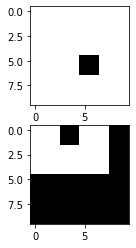

In [19]:
m = SimilarityTransform(translation=(2,5))

img = np.ones(shape=(10, 10))
img[5:7, 5:7] = 0
img_translated = warp(img, m)

fig, ax = plt.subplots(2,1)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(img_translated, cmap="gray")
plt.show()

In [14]:
m = SimilarityTransform(scale=(2,3))
